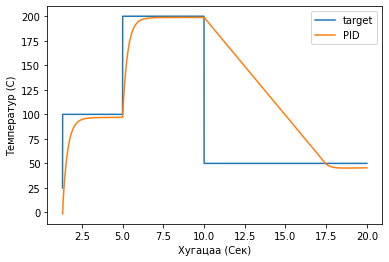

In [22]:
from simple_pid import PID
import pandas as pd
from matplotlib import pyplot as plt 
import time

class heater:
    def __init__(self):
        self.temp = 25
    def update(self, power, dt):
        if power > 0:
             
            #Variation of room temperature with power and time variable dt during heating
            self.temp += 20 * power * dt
        #Indicates heat loss in a room
        self.temp -= 20 * dt
        return self.temp


heater = heater()
temp = heater.temp
#Set three parameters of PID and limit output
pid = PID(2, 0.1, 0.1, setpoint=temp)
pid.output_limits = (0, None)
#Used to set time parameters
start_time = time.time()
last_time = start_time
#Visualize Output Results
setpoint, y, x = [], [], []
#Set System Runtime
while time.time() - start_time < 20: 
    
    #Setting the time variable dt
    current_time = time.time()
    dt = (current_time - last_time)
    
    #The variable temp is used as the output in the whole system, and the difference between the variable temp and the ideal value is used as the input in the feedback loop to adjust the change of the variable power.
    power = pid(temp)
    temp = heater.update(power, dt)
    
    #Visualize Output Results
    x += [current_time - start_time]
    y += [temp]
    setpoint += [pid.setpoint]
    #Used for initial value assignment of variable temp
    if current_time - start_time > 0:
        pid.setpoint = 100
    
    if current_time - start_time > 5:
        pid.setpoint = 200
    
    if current_time - start_time > 10:
        pid.setpoint = 50

    last_time = current_time

#Visualization of Output Results
plt.plot(x, setpoint, label='target')
plt.plot(x, y, label='PID')
plt.xlabel('Хугацаа (Сек)')
plt.ylabel('Температур (С)')
plt.legend()
plt.show()